# Microsoft Q# Coding Contest - Summer 2018

In [7]:
import qiskit
#量子ビットモジュール
from qiskit import QuantumRegister
from qiskit import QuantumCircuit
#古典ビットモジュール
from qiskit import ClassicalRegister
from qiskit import Aer
from qiskit import execute

In [2]:
# 1 量子ビットを定義する
q1 = QuantumRegister(1)
# 1 古典ビットを定義する
c1 = ClassicalRegister(1)
# 結果の個数をカウントする (1000ショット)
def get_result(qc, shots=1000):
    simulator = Aer.get_backend('qasm_simulator')
    return execute(qc, simulator, shots=shots).result().get_counts(qc)
# 行列を表示する
def get_unitary(qc):
    simulator = Aer.get_backend('unitary_simulator') 
    return execute(qc, simulator).result().get_unitary(qc)

##### EPR対

In [3]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
qc2 = QuantumCircuit(q2,c2)
# Xゲートを第一ビットに適用
qc2.h(0)
# 制御NOTゲートを2ビットに適用 cx(controlled_bit, target_bit) 
qc2.cx(0,1)
qc2.measure(q2,c2)
print('after cx') 

#量子回路表示
print(qc2)
get_result(qc2,10000)

after cx
      ┌───┐     ┌─┐   
q1_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q1_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c1: 2/═══════════╩══╩═
                 0  1 


{'00': 4967, '11': 5033}

## Warmup ラウンド

### A. Generate plus state or minus state

In [4]:
qc1 = QuantumCircuit(q1,c1)

switch = int(input("switch >>> "))

if switch == 1:
    qc1.h(0)
    print(get_unitary(qc1)) 
    qc1.measure(q1,c1) 
    print(get_result(qc1))
    #量子回路表示
    print(qc1)
    
if switch == 0:
    qc1.x(0)
    qc1.h(0)
    print(get_unitary(qc1)) 
    qc1.measure(q1,c1) 
    print(get_result(qc1))
    #量子回路表示
    print(qc1)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]
{'0': 482, '1': 518}
      ┌───┐┌─┐
q0_0: ┤ H ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0 


### <span style="color: red; ">B. Generate Bell State</span>
入力：|00> , 整数{0,1,2,3}
<br>
出力：４つのベル状態

In [16]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
qc2 = QuantumCircuit(q2,c2) 

def generateB_0(qc):
    #第一ビットにアダマール
    qc.h(0)
    #２ビットにCXゲート
    qc.cx(0,1)

generateB_0(qc2)

index = int(input())
if index % 2 == 1:
    qc2.z(1)
if index // 2 == 1:
    qc2.x(1)

print(qc2)

3
         ┌───┐               
q8_0: |0>┤ H ├──■────────────
         └───┘┌─┴─┐┌───┐┌───┐
q8_1: |0>─────┤ X ├┤ Z ├┤ X ├
              └───┘└───┘└───┘
 c8_0: 0 ════════════════════
                             
 c8_1: 0 ════════════════════
                             


### C.Generate GHZ state
入力：Nビット量子状態
$$
|0...0> (1 \leqq N \leqq 8)
$$
<br>
出力：(Greenberger-Horne-Zeilinger state)
$$ 
    |GHZ> \ = \  \frac{|0...0> + |1...1>} {\sqrt{2}}
$$

In [17]:
N = int(input("N >>> "))
qN = QuantumRegister(N)
cN = ClassicalRegister(N)
qcN = QuantumCircuit(qN , cN)

#第一ビットにアダマール
qcN.h(0)

if N >= 2:
    qcN.cx(0,1)

#第１，２ビットと第３ビット以降を順々にCCXゲートを適用
M = N-2
if 1 <= M:
    for i in range(2,M + 2):
        qcN.cx(0,i)
else:
    pass


#結果表示
qcN.measure(qN,cN)
print(get_result(qcN))
print(qcN)


N >>> 4
{'1111': 504, '0000': 496}
         ┌───┐                     ┌─┐   
q9_0: |0>┤ H ├──■────■───────■─────┤M├───
         └───┘┌─┴─┐  │  ┌─┐  │     └╥┘   
q9_1: |0>─────┤ X ├──┼──┤M├──┼──────╫────
              └───┘┌─┴─┐└╥┘  │  ┌─┐ ║    
q9_2: |0>──────────┤ X ├─╫───┼──┤M├─╫────
                   └───┘ ║ ┌─┴─┐└╥┘ ║ ┌─┐
q9_3: |0>────────────────╫─┤ X ├─╫──╫─┤M├
                         ║ └───┘ ║  ║ └╥┘
 c9_0: 0 ════════════════╬═══════╬══╩══╬═
                         ║       ║     ║ 
 c9_1: 0 ════════════════╩═══════╬═════╬═
                                 ║     ║ 
 c9_2: 0 ════════════════════════╩═════╬═
                                       ║ 
 c9_3: 0 ══════════════════════════════╩═
                                         


### D. Distinguish plus state and minus state
入力：|+> or |->
<br>
出力：|+> or |->　を測定によって判別

In [31]:
#入力量子ビットの作成=＝＝＝＝＝＝＝＝＝＝＝＝＝
state=input("input state:{|+> ('p')} or {|-> ('n')} >>> ")
q1 = QuantumRegister(1)
c1 = ClassicalRegister(1)
qc1 = QuantumCircuit(q1 , c1)

if state == "p":
    qc1.h(0)
    print("state:|+>")
elif state == "n":
    qc1.x(0)
    qc1.h(0)
    print("state:|->")
#=＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

#判定プログラム＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
qc1.h(0)
qc1.measure(q1,c1)
measure_result = get_result(qc1)

for bit in measure_result:
    if bit == "0":
        print("judge:|+>")
    elif bit == "1":
        print("judge:|->")
    else:
        print("ERROR")
#=＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝

input state:{|+> ('p')} or {|-> ('n')} >>> n
state:|->
judge:|->


# ====================================

### <span style="color: red; "> E. Distinguish Bell State </span> 
入力：Bで出てきた４つのベル状態
<br>
出力：どのベル状態かを判別

In [28]:
#４つのベル状態生成===========================
q0 = QuantumRegister(2)
c0 = ClassicalRegister(2)
qc0 = QuantumCircuit(q0,c0) 

q1 = QuantumRegister(2)
c1 = ClassicalRegister(2)
qc1 = QuantumCircuit(q1,c1) 

q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
qc2 = QuantumCircuit(q2,c2)

q3 = QuantumRegister(2)
c3 = ClassicalRegister(2)
qc3 = QuantumCircuit(q3,c3) 

def generateB_0(qc):
    #第一ビットにアダマール
    qc.h(0)
    #２ビットにCXゲート
    qc.cx(0,1)

generateB_0(qc0)
generateB_0(qc1)
generateB_0(qc2)
generateB_0(qc3)

Bell_state = [qc0,qc1,qc2,qc3]

for i in range(0,4):
    if i % 2 == 1:
        Bell_state[i].z(1)
    if i // 2 == 1:
        Bell_state[i].x(1)
    #print("Bell_state",i)
    #print(Bell_state[i])
#=============================================

#判定プログラム
print("select Bell state {0,1,2,3} >>> ")
i = int(input())
q_Bi = QuantumRegister(2)
c_Bi = ClassicalRegister(2)
qc_Bi = Bell_state[i]

qc_Bi.cx(0,1)
qc_Bi.h(0)
print(qc_Bi)
qc_Bi.measure(q_Bi,c_Bi)
print(get_result(qc_Bi))

select Bell state {0,1,2,3} >>> 
3
          ┌───┐                    ┌───┐
q74_0: |0>┤ H ├──■──────────────■──┤ H ├
          └───┘┌─┴─┐┌───┐┌───┐┌─┴─┐└───┘
q74_1: |0>─────┤ X ├┤ Z ├┤ X ├┤ X ├─────
               └───┘└───┘└───┘└───┘     
 c73_0: 0 ══════════════════════════════
                                        
 c73_1: 0 ══════════════════════════════
                                        


CircuitError: 'register not in this circuit'

### F. Distinguish multi-qubit basis states
入力：一つの量子ビット列と ビット列を表現する２つのBool列
<br>
e.g.<pre> |10> , [True,False] -> 10 , [True,True] -> 11 </pre>
<br>
２つのBool列は少なくとも一箇所異なっていることが保証されている。
<br>
<br>
出力：与えられた量子ビット列がどちらのビット列によって表されているかを判別

In [40]:
#入力===========================
#量子ビット
N = int(input("enter length of qubit >>> "))
qN = QuantumRegister(N)
cN = ClassicalRegister(N)
qcN = QuantumCircuit(qN,cN) 
qubit = [0]*N
for i in range(len(qubit)):
    print("enter" , i , "st bit of qubit >>> ")
    buffer = int(input())
    qubit[i] = buffer
    if buffer == 0:
        pass
    elif buffer == 1:
        qcN.x(i)
    else:
        pass
    
#Bool列
Bool1 = [True]*N
Bool2 = [True]*N
for i in range(len(Bool1)):
    print("enter" , i , "st bit of Bool1 >>> ")
    Bool1[i] = bool(input())
for i in range(len(Bool2)):
    print("enter" , i , "st bit of Bool2 >>> ")
    Bool2[i] = bool(input())
    
print("qubit")
print(qcN)
print("Bool1:" , Bool1)
print("Bool2:" , Bool2)
#===============================



enter length of qubit >>> 3
enter 0 st bit of qubit >>> 
1
enter 1 st bit of qubit >>> 
1
enter 2 st bit of qubit >>> 
1
enter 0 st bit of Bool1 >>> 
1
enter 1 st bit of Bool1 >>> 
1
enter 2 st bit of Bool1 >>> 
1
enter 0 st bit of Bool2 >>> 
1
enter 1 st bit of Bool2 >>> 
1
enter 2 st bit of Bool2 >>> 
1
qubit
          ┌───┐
q41_0: |0>┤ X ├
          ├───┤
q41_1: |0>┤ X ├
          ├───┤
q41_2: |0>┤ X ├
          └───┘
 c41_0: 0 ═════
               
 c41_1: 0 ═════
               
 c41_2: 0 ═════
               
Bool1: [True, True, True]
Bool2: [True, True, True]


### G. Oracle for f(x)=k-th element of x
入力：量子ビット列xと出力となる量子ビットy、そして整数k
<br>
出力：xのk番目の量子ビットが|0>なら何もせず、|1>なら出力となるyのビットを反転するオラクル

In [37]:
#入力===========================
#量子ビットx 初期化
Nx = int(input("enter length of qubit x >>> "))
qNx = QuantumRegister(Nx)
cNx = ClassicalRegister(Nx)
qcNx = QuantumCircuit(qNx,cNx)
#量子ビットy 初期化
Ny = int(input("enter length of qubit y >>> "))
qNy = QuantumRegister(Ny)
cNy = ClassicalRegister(Ny)
qcNy = QuantumCircuit(qNy,cNy)

#量子ビットx セット
qubitx = [0]*Nx
for i in range(len(qubitx)):
    print("enter" , i , "st bit of qubit_x >>> ")
    buffer = int(input())
    qubitx[i] = buffer
    if buffer == 0:
        pass
    elif buffer == 1:
        qcNx.x(i)
    else:
        pass

#量子ビットy セット
qubity = [0]*Ny
for i in range(len(qubity)):
    print("enter" , i , "st bit of qubit_y >>> ")
    buffer = int(input())
    qubity[i] = buffer
    if buffer == 0:
        pass
    elif buffer == 1:
        qcNy.x(i)
    else:
        pass
    
print("qubit_x")
print(qcNx)
print("qubit_y")
print(qcNy)
#===============================

enter length of qubit x >>> 3
enter length of qubit y >>> 3
enter 0 st bit of qubit_x >>> 
1
enter 1 st bit of qubit_x >>> 
1
enter 2 st bit of qubit_x >>> 
0
enter 0 st bit of qubit_y >>> 
0
enter 1 st bit of qubit_y >>> 
1
enter 2 st bit of qubit_y >>> 
1
          ┌───┐
q37_0: |0>┤ X ├
          ├───┤
q37_1: |0>┤ X ├
          └───┘
q37_2: |0>─────
               
 c37_0: 0 ═════
               
 c37_1: 0 ═════
               
 c37_2: 0 ═════
                               
q38_0: |0>─────
          ┌───┐
q38_1: |0>┤ X ├
          ├───┤
q38_2: |0>┤ X ├
          └───┘
 c38_0: 0 ═════
               
 c38_1: 0 ═════
               
 c38_2: 0 ═════
               


### ***H. Oracle for f(x) = parity of the number of 1s in x***
入力：量子ビット列x(n qbit)と出力となる量子ビットy(1 qbit)
<br>
出力：xのうち|1>の数が偶数なら何もせず、奇数だったら出力ビットを反転するオラクル

In [27]:
from qiskit_basic_kit import *
# 入力 =============================================
X = [0,1,0,1]
N = len(X) + 1
# 量子回路 =====================================
qN = QuantumRegister(N)
cN = ClassicalRegister(N)
qcN = QuantumCircuit(qN,cN)

# 解 =============================================
for i in range(len(X)):
    if X[i] == 0:
        pass
    else:
        qcN.x(i)
        qcN.cx(i,N-1)
    qcN.barrier()
print(qcN)

        ░            ░  ░            ░ 
q27_0: ─░────────────░──░────────────░─
        ░ ┌───┐      ░  ░            ░ 
q27_1: ─░─┤ X ├──■───░──░────────────░─
        ░ └───┘  │   ░  ░            ░ 
q27_2: ─░────────┼───░──░────────────░─
        ░        │   ░  ░ ┌───┐      ░ 
q27_3: ─░────────┼───░──░─┤ X ├──■───░─
        ░      ┌─┴─┐ ░  ░ └───┘┌─┴─┐ ░ 
q27_4: ─░──────┤ X ├─░──░──────┤ X ├─░─
        ░      └───┘ ░  ░      └───┘ ░ 
c21: 5/════════════════════════════════
                                       


### I. Deutsch-Jozsa algorithm
入力：n qbit
<br>
出力：入力がバランスかコンスタントかを判定

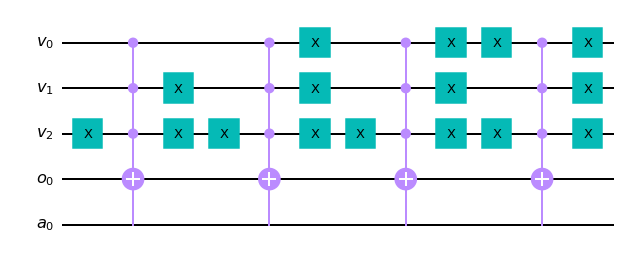

In [13]:
import math
import numpy as np
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance

# 入力：関数fの出力値の文字列bitstr
bitstr = '11110000'
# オラクル作成
# TruthTableOracleを使うと関数fの出力を返すような真理値表に対応するオラクルを作成してくれる
from qiskit.aqua.algorithms import DeutschJozsa
from qiskit.aqua.components.oracles import TruthTableOracle
oracle = TruthTableOracle(bitstr)
# オラクルを表示してみる
oracle.circuit.draw(output='mpl')

見ての通り、 𝑣𝑖
 は三つの入力ビットに、 𝑜0
 はオラクルの出力ビットに、 𝑎0
 は補助ビットにそれぞれ対応しています。

次に、オラクルを用いて DeutschJozsa インスタンスを作成し、実行して結果を確認します。

In [14]:
dj = DeutschJozsa(oracle)
backend = BasicAer.get_backend('qasm_simulator')
result = dj.run(QuantumInstance(backend, shots=1024))
print(f'The truth table {bitstr} represents a \'{result["result"]}\' function.')

The truth table 11110000 represents a 'balanced' function.
